# DatPrepSim: Data Preparation Simulation
***

## Hintergrund

In der Biotechnologie und insbesondere in der Fermentationstechnologie spielen Daten eine entscheidende Rolle bei der Optimierung und Kontrolle von Produktionsprozessen. Jedoch sind Rohdaten aus biotechnologischen Experimenten häufig fehlerbehaftet, was die Analyse und Modellierung erschwert. Fehler wie Rauschen, Ausreißer oder fehlende Werte können zu irreführenden Ergebnissen führen und müssen daher vor der eigentlichen Analyse bereinigt werden.

Dieses Notebook zielt darauf ab, Ihnen die Wichtigkeit der Datenvorbereitung zu verdeutlichen und Ihnen Methoden zur Bereinigung solcher Fehler in Fermentationsdaten an die Hand zu geben. Durch die schrittweise Durchführung von manuellen und automatisierten Datenbereinigungstechniken erhalten Sie ein tiefes Verständnis dafür, wie sich Datenqualität auf die Genauigkeit von Modellen und die Validität von Forschungsergebnissen auswirkt.

<figure>
    <img src="Figures/DataPreperation.jpg" width="600">
    <figcaption>Typische Schritte in der Daten Verarbeitung</figcaption>
</figure>


In diesem Projekt werden wir typische Fehler in Fermentationsdaten simulieren, um Ihnen zu zeigen, wie diese Fehler identifiziert und behoben werden 
können. Für die Simulation der Fermentationsdaten wird die Wachstumskinetik nach Monod genutzt. Nachfolgend sind die hierfür genutzen Gleichungen der Monod Kinetik dargestellt.
<figure>
    <img src="Figures/Equations.png" width="300">
    <figcaption>Gleichungen aus der Monod-Kinetik</figcaption>
</figure>

| Parameter       | Beschreibung                                                 |
|-----------------|--------------------------------------------------------------|
| µ<sub>max</sub> | maximale spezifische Wachstumsrate [h<sup>-1</sup>           |
| c<sub>s</sub>   | Konzentration des limitierenden Substrats [g/L]              |
| K<sub>s</sub>   | halbmaximale Geschwindidkeitskonstante [g/L]                 |
| Y<sub>x</sub>   | Ausbeutekoeffizient Substrat zu Biomasse [g/g]               |
| k<sub>1</sub>   | Produktionsrate (nicht wachstumsgekoppelt) [-]               |


Am Ende dieses Notebooks sollen Sie in der Lage sein, saubere und qualitativ hochwertige Daten zu erzeugen, die für weitere Analysen oder maschinelle Lernmodelle verwendet werden können.


Die Aufbereitung solcher Daten ist entscheidend, um verlässliche Modelle zu erstellen und fundierte Entscheidungen zu treffen. Dieses Notebook führt Sie durch die wichtigsten Techniken der Datenbereinigung und zeigt Ihnen, wie Sie mit diesen Herausforderungen umgehen können.

## Workflow

**1 Set-up der Simulationsumgebung**

**2 Datenvisualisierung und Fehleridentifikation**
 
**3 Manuelle Datenbereinigung**
     
 * *3.1 Manuelles Entfernen von Ausreißern*     
 * *3.2 Umgang mit fehlenden Daten*
 * *3.3 Entfernen von Rauschen*     

**4 Automatisierte Datenbereinigung**
 * *4.1 Lücken in den Daten füllen*
 * *4.2 Ausreißerentfernung*
 * *4.3 Automatische Rauschbereinigung*

**5 Nutzen der bereinigten Daten**
 * *5.1 KNN-Modell Erstellung*
 * *5.2 Bewertung der Modellleistung und Reflexion über die Auswirkungen der Datenbereinigung*

## 1 Set-up der Simulationsumgebung

In [ ]:
# # Überprüfen der Installationsanforderungen
# Laden wichtiger Funktionalitäten für das Notebook:
import os
import numpy as np
import pandas as pd

import ipywidgets as widgets
from IPython.display import display

# Lade matplotlib, eine Bibliothek für die Visualisierung:
import matplotlib.pyplot as plt
%matplotlib inline
from DatPrep_Modul import Datensatz, MonodModel

if not os.path.isdir("Data"):
    os.mkdir("Data")
    print("Created folder!")
else:
    print("Already there!")
    

print("System ready")

## 2 Datenanalyse und Visualisierung

Bevor wir mit der Datenbereinigung beginnen, werfen wir einen ersten Blick auf den Datensatz. Die Visualisierung der Rohdaten hilft uns, ein besseres Verständnis für deren Struktur zu entwickeln und potenzielle Fehler zu identifizieren.

In den folgenden Schritten werden wir den Datensatz laden und visualisieren, um die verschiedenen Fehlerarten zu erkennen, wie z.B.:

- **Ausreißer**: Einzelne Werte, die deutlich von den übrigen abweichen.
- **Fehlende Werte**: Lücken in der Datenreihe, die durch unvollständige Messungen entstehen können.
- **Rauschen**: Unregelmäßige Schwankungen in den Daten.

Erstellen und visualisieren Sie nun den Datensatz.

In [ ]:
seed = 123456 # ersetzen Sie diese durch Ihre Matrikelnummer

# als erstes wird ein zufälliger Datensatz erstellt, wobei ihre Matrikelnummer für die Reproduzierbarkeit genutzt wird
dataset = Datensatz(random_seed=seed)
# darstellen des kleines Datensatzes, um jeden Fehlertyp separat darzustellen
dataset.plot_default_dataset_1()

# 3 Manuelle Datenbereinigung
Daten aus Experimenten oder Prozessen, wie in diesem Beispiel aus Fermentationsprozessen, sind oft fehlerbehaftet und müssen sorgfältig bereinigt werden, bevor sie für die Analyse oder Modellierung verwendet werden können. Manuelle Datenbereinigung bedeutet, dass Sie als Anwender die Daten direkt überprüfen und korrigieren. Dies ist ein wichtiger Schritt, um ein tiefes Verständnis für die Art der auftretenden Fehler und deren Auswirkungen auf die Datenqualität zu entwickeln.

Bei der manuellen Datenbereinigung geht es darum, typische Fehler wie Rauschen, Ausreißer und fehlende Werte zu erkennen und gezielt zu korrigieren. Obwohl dieser Prozess zeitaufwändig ist, gibt er Ihnen die Möglichkeit, die Daten „mit eigenen Augen“ zu sehen und problematische Bereiche zu identifizieren. Durch diese direkte Auseinandersetzung mit den Daten lernen Sie, wie solche Fehler entstehen und welche Auswirkungen sie auf die Analyse haben können.

Manuelle Datenbereinigung ist oft der erste Schritt in der Datenvorbereitung, bevor automatisierte Methoden angewendet werden. Sie ist besonders nützlich, wenn die Datenmenge überschaubar ist oder wenn Sie ein tiefes Verständnis für die Datenstruktur und die Art der Fehler erlangen möchten.
### 3.1 Manuelles Entfernen von Ausreißern

In diesem Abschnitt lernen Sie, wie Sie Ausreißer manuell aus den Daten entfernen. Ausreißer sind Werte, die deutlich außerhalb des erwarteten Bereichs liegen und das Gesamtergebnis verfälschen können. Typische Ursachen für Ausreißer sind Messfehler oder unerwartete Ereignisse während des Experiments.

#### Warum sind Ausreißer problematisch?

Ausreißer können die Analyseergebnisse erheblich verzerren, da sie extreme Werte darstellen, die stark von der Mehrheit der Datenpunkte abweichen. Diese extremen Werte können verschiedene Ursachen haben, wie zum Beispiel Messfehler, Eingabefehler oder unvorhergesehene Ereignisse während des Experiments.

Problematisch ist, dass Ausreißer:

- **Statistische Analysen beeinflussen**: Viele statistische Methoden, wie der Mittelwert oder die Standardabweichung, sind sehr empfindlich gegenüber Ausreißern und liefern daher verfälschte Ergebnisse.
- **Modelltraining stören**: Maschinelle Lernmodelle können durch Ausreißer „fehlgeleitet“ werden und lernen, dass diese Ausreißer normal sind, was zu einer schlechten Vorhersagegenauigkeit führt.
- **Trends und Muster verdecken**: Ausreißer können die Identifizierung echter Trends und Muster erschweren, da sie das Gesamtbild der Daten verzerren.

Es ist daher wichtig, Ausreißer zu erkennen und zu behandeln, bevor die Daten für Analysen oder Modellierungen verwendet werden.

#### Aufgabe:
1. Daten exportieren: Speichern Sie die Biomassedaten mit Ausreißern als CSV-Datei.


In [ ]:
### 1 exportiere und manipuliere die Daten
outliers_name = "Data/outliers.csv"
outliers_id = 2

df_outliers = pd.DataFrame(dataset.default_dataset_1.models[outliers_id].Results)
df_outliers.to_csv(outliers_name, index=None)

print(f"{outliers_name} saved!")

#### Aufgaben fortsetzen:
2. Bearbeiten: Öffnen Sie die CSV-Datei mit einem Tabellenkalkulationsprogramm (z.B. Excel) und entfernen Sie die Ausreißer. Sie können die Werte am besten auf plausible Werte setzen.
3. Daten importieren: Laden Sie die bearbeitete CSV-Datei zurück ins Notebook und visualisieren Sie die bereinigten Daten.
4. Wiederholen Sie die Schritte 1-3 solange bis alle Ausreißer aus den Daten entfernt worden sind.

In [ ]:
### 3 importiere und visualisier die veränderten Daten
df_outliers_cleaned = pd.read_csv(outliers_name)
df_outliers_cleaned.iloc[:, :-1].plot(title="Ausreißer entfernt", xlabel="Zeit in h", ylabel="Konzentration in g/L")

Nachdem Sie die Daten erfolgreich von den Ausreißern bereinigt haben, müssen Sie die neuen Daten noch im alten Datensatz speichern.

In [ ]:
### speichern der bereinigten Daten, sobald alle Ausreißer durch sinnvolle Werten ersetzt worden sind
dataset.default_dataset_1.models[outliers_id].Results = df_outliers_cleaned.to_dict(orient="list")
print("outliers free data saved inside the dataset")

### 3.2 Umgang mit fehlenden Werten

In diesem Abschnitt werden wir uns mit fehlenden Werten in den Daten beschäftigen. Fehlende Werte treten häufig auf, wenn Messungen nicht durchgeführt wurden oder Daten unvollständig aufgezeichnet wurden. Diese Lücken können die Analyse erschweren und müssen vor der weiteren Verarbeitung gefüllt oder entfernt werden.

#### Warum sind fehlende Werte problematisch?
Fehlende Werte stellen in vielen Datensätzen eine große Herausforderung dar, insbesondere wenn sie systematisch auftreten oder ganze Zeiträume oder Messpunkte betreffen. Diese Lücken in den Daten können durch unvollständige Datenerfassung, technische Probleme oder andere Ursachen entstehen.

Problematisch ist, dass fehlende Werte:

- **Analyse verzerren**: Fehlende Werte können zu falschen Schlüssen führen, da wichtige Informationen fehlen und die Repräsentativität der Daten beeinträchtigt wird.
- **Berechnungen erschweren**: Viele Analyseverfahren und Algorithmen können nicht mit fehlenden Werten umgehen und erfordern eine Vorverarbeitung, um die Datenlücken zu füllen oder zu entfernen.
- **Muster und Trends verdecken**: Fehlende Werte können die Erkennung von Mustern und Trends in den Daten erschweren, da die Daten unvollständig und möglicherweise verzerrt sind.

Daher ist es wichtig, fehlende Werte sorgfältig zu behandeln, um die Integrität und Aussagekraft der Daten zu gewährleisten.

#### Aufgabe:
Grundsätzlich befolgen Sie das gleiche Vorgehen wie bei der Ausreißerentfernung.
1. Daten exportieren
2. Bearbeiten
3. Daten importieren und visualisieren
4. ggf. Schritte 1-3 wiederholen


In [ ]:
### 1 exportiere und manipuliere die Daten
missing_values_name = "Data/missing_values.csv"
missing_id = 3

df_missing_values = pd.DataFrame(dataset.default_dataset_1.models[missing_id].Results)
df_missing_values.to_csv(missing_values_name, index=None)

print(f"{missing_values_name} saved!")

In [ ]:
### 3 importiere und visualisier die veränderten Daten
df_missing_values_cleaned = pd.read_csv(missing_values_name)
df_missing_values_cleaned.iloc[:, :-1].plot(title="fehlende Werte aufgefüllt", xlabel="Zeit in h", ylabel="Konzentration in g/L")

In [ ]:
### speichern der bereinigten Daten, sobald alle fehlenden Werte mit sinnvollen Werten aufgefüllt worden sind
dataset.default_dataset_1.models[missing_id].Results = df_outliers_cleaned.to_dict(orient="list")
print("missing values free data saved inside the dataset")

### 3.3 Entfernen von Rauschen

Rauschen ist einer der schwierigsten Fehler, die in Daten auftreten können, da es keine klaren Ausreißer oder offensichtliche Lücken darstellt. Stattdessen besteht Rauschen aus zufälligen, unvorhersehbaren Schwankungen, die die wahren Muster und Trends überlagern. In den Fermentationsdaten kann es durch ungenaue Messungen, Umwelteinflüsse oder technische Störungen entstehen.

#### Warum ist Rauschen problematisch?

Rauschen stellt eine der größten Herausforderungen in der Datenanalyse dar, da es aus zufälligen Schwankungen besteht, die das wahre Signal überlagern. Es kann durch ungenaue Messungen, Umwelteinflüsse oder technische Störungen verursacht werden und beeinflusst die Daten auf eine subtile, aber tiefgreifende Weise.

Problematisch ist, dass Rauschen:

- **Echte Muster verdeckt**: Rauschen erschwert die Erkennung von echten Trends und Mustern, da es das Signal „verwischt“ und Zufallsschwankungen überbetont.
- **Analyse und Vorhersagen verfälscht**: Durch Rauschen werden Berechnungen wie Mittelwerte, Standardabweichungen oder Regressionen verfälscht, da die Zufallskomponenten in die Analyse einbezogen werden.
- **Modellleistung beeinträchtigt**: Maschinelle Lernmodelle können durch Rauschen in den Daten fehlgeleitet werden, was zu ungenauen Vorhersagen und einer schlechten Generalisierung führt.
- **Fehlalarme auslöst**: In Bereichen wie Prozessüberwachung oder Qualitätskontrolle kann Rauschen zu „Fehlalarmen“ führen, da normale Schwankungen fälschlicherweise als kritische Abweichungen interpretiert werden.

#### Tipps zur manuellen Glättung:

- **Visuelle Glättung**: Schauen Sie sich den Verlauf der Daten an und versuchen Sie, auffällige Spitzen und Täler zu identifizieren. Diese können Sie durch Werte ersetzen, die den allgemeinen Verlauf besser repräsentieren.
- **Durchschnittswerte**: Berechnen Sie den Durchschnittswert der umliegenden Datenpunkte und verwenden Sie diesen Wert, um starke Schwankungen zu glätten.
- **Kontinuität bewahren**: Achten Sie darauf, dass die Daten nach der Bearbeitung einen kontinuierlichen Verlauf haben, ohne abrupte Änderungen.

#### Aufgabe:
Grundsätzlich befolgen Sie das gleiche Vorgehen wie bei den beiden vorherigen Fehlerbehebungen.
1. Daten exportieren
2. Bearbeiten
3. Daten importieren und visualisieren
4. ggf. Schritte 1-3 wiederholen

In [ ]:
### 1 exportiere und manipuliere die Daten
noise_name = "Data/noisy_values.csv"
noise_id = 1

df_noisy_values = pd.DataFrame(dataset.default_dataset_1.models[noise_id].Results)
df_noisy_values.to_csv(noise_name, index=None)

print(f"{noise_name} saved!")

In [ ]:
### 3 importiere und visualisieren die veränderten Daten
df_noisy_values_cleaned = pd.read_csv(noise_name)
df_noisy_values_cleaned.iloc[:, :-1].plot(title="Rauschbereinigt", xlabel="Zeit in h", ylabel="Konzentration in g/L")

In [ ]:
### speichern der bereinigten Daten, sobald das Rauschen entfernt wurde
dataset.default_dataset_1.models[noise_id].Results = df_noisy_values_cleaned.to_dict(orient="list")
print("noisy free data saved inside the dataset")

Abschließend können Sie sich noch einmal den kompletten von allen Fehlern bereinigten Datensatz darstellen lassen.

In [ ]:
### visualisere noch einmal den gesamten ersten Datensatz
dataset.plot_default_dataset_1()

## 4 Automatisierte Datenbereinigung

Während die manuelle Datenbereinigung eine wertvolle Übung ist, um ein tiefes Verständnis für die Datenstruktur zu entwickeln, ist sie bei großen Datensätzen oder komplexen Fehlern nicht praktikabel. Hier kommt die automatisierte Datenbereinigung ins Spiel. Mit Hilfe von Programmierwerkzeugen und Algorithmen können typische Datenfehler systematisch und effizient erkannt und korrigiert werden.

Automatisierte Datenbereinigungstechniken umfassen Methoden wie die Erkennung und Entfernung von Ausreißern, das Füllen fehlender Werte oder das Glätten von Rauschen. Diese Techniken ermöglichen es, große Datenmengen in kurzer Zeit zu bereinigen und konsistente, qualitativ hochwertige Daten für die Analyse oder Modellierung zu erzeugen.

In diesem Abschnitt werden Sie lernen, wie Sie Python-Bibliotheken wie Pandas und NumPy einsetzen können, um Fehler in Ihren Daten zu identifizieren und zu beheben. Sie werden sehen, dass automatisierte Methoden nicht nur schneller, sondern auch objektiver und wiederholbarer sind als manuelle Ansätze.

Durch die Anwendung dieser Techniken können Sie:

- **Effizienter arbeiten**: Zeit sparen, indem Sie Datenprobleme mit wenigen Zeilen Code lösen.
- **Konsistente Ergebnisse erzielen**: Sicherstellen, dass alle Daten auf die gleiche Weise bearbeitet werden.
- **Ihre Datenqualität verbessern**: Systematische Fehler erkennen und beheben, die bei der manuellen Bereinigung übersehen werden könnten.

Automatisierte Datenbereinigung ist ein unverzichtbares Werkzeug in jedem Datenanalyse-Workflow, insbesondere wenn Sie mit großen Datensätzen und/oder komplexen Daten arbeiten. Zunächst visualisieren wir uns den zweiten etwas größeren Datensatz mit 20 Fermentationen, um die möglichen enthaltenen Fehler zu erkennen.

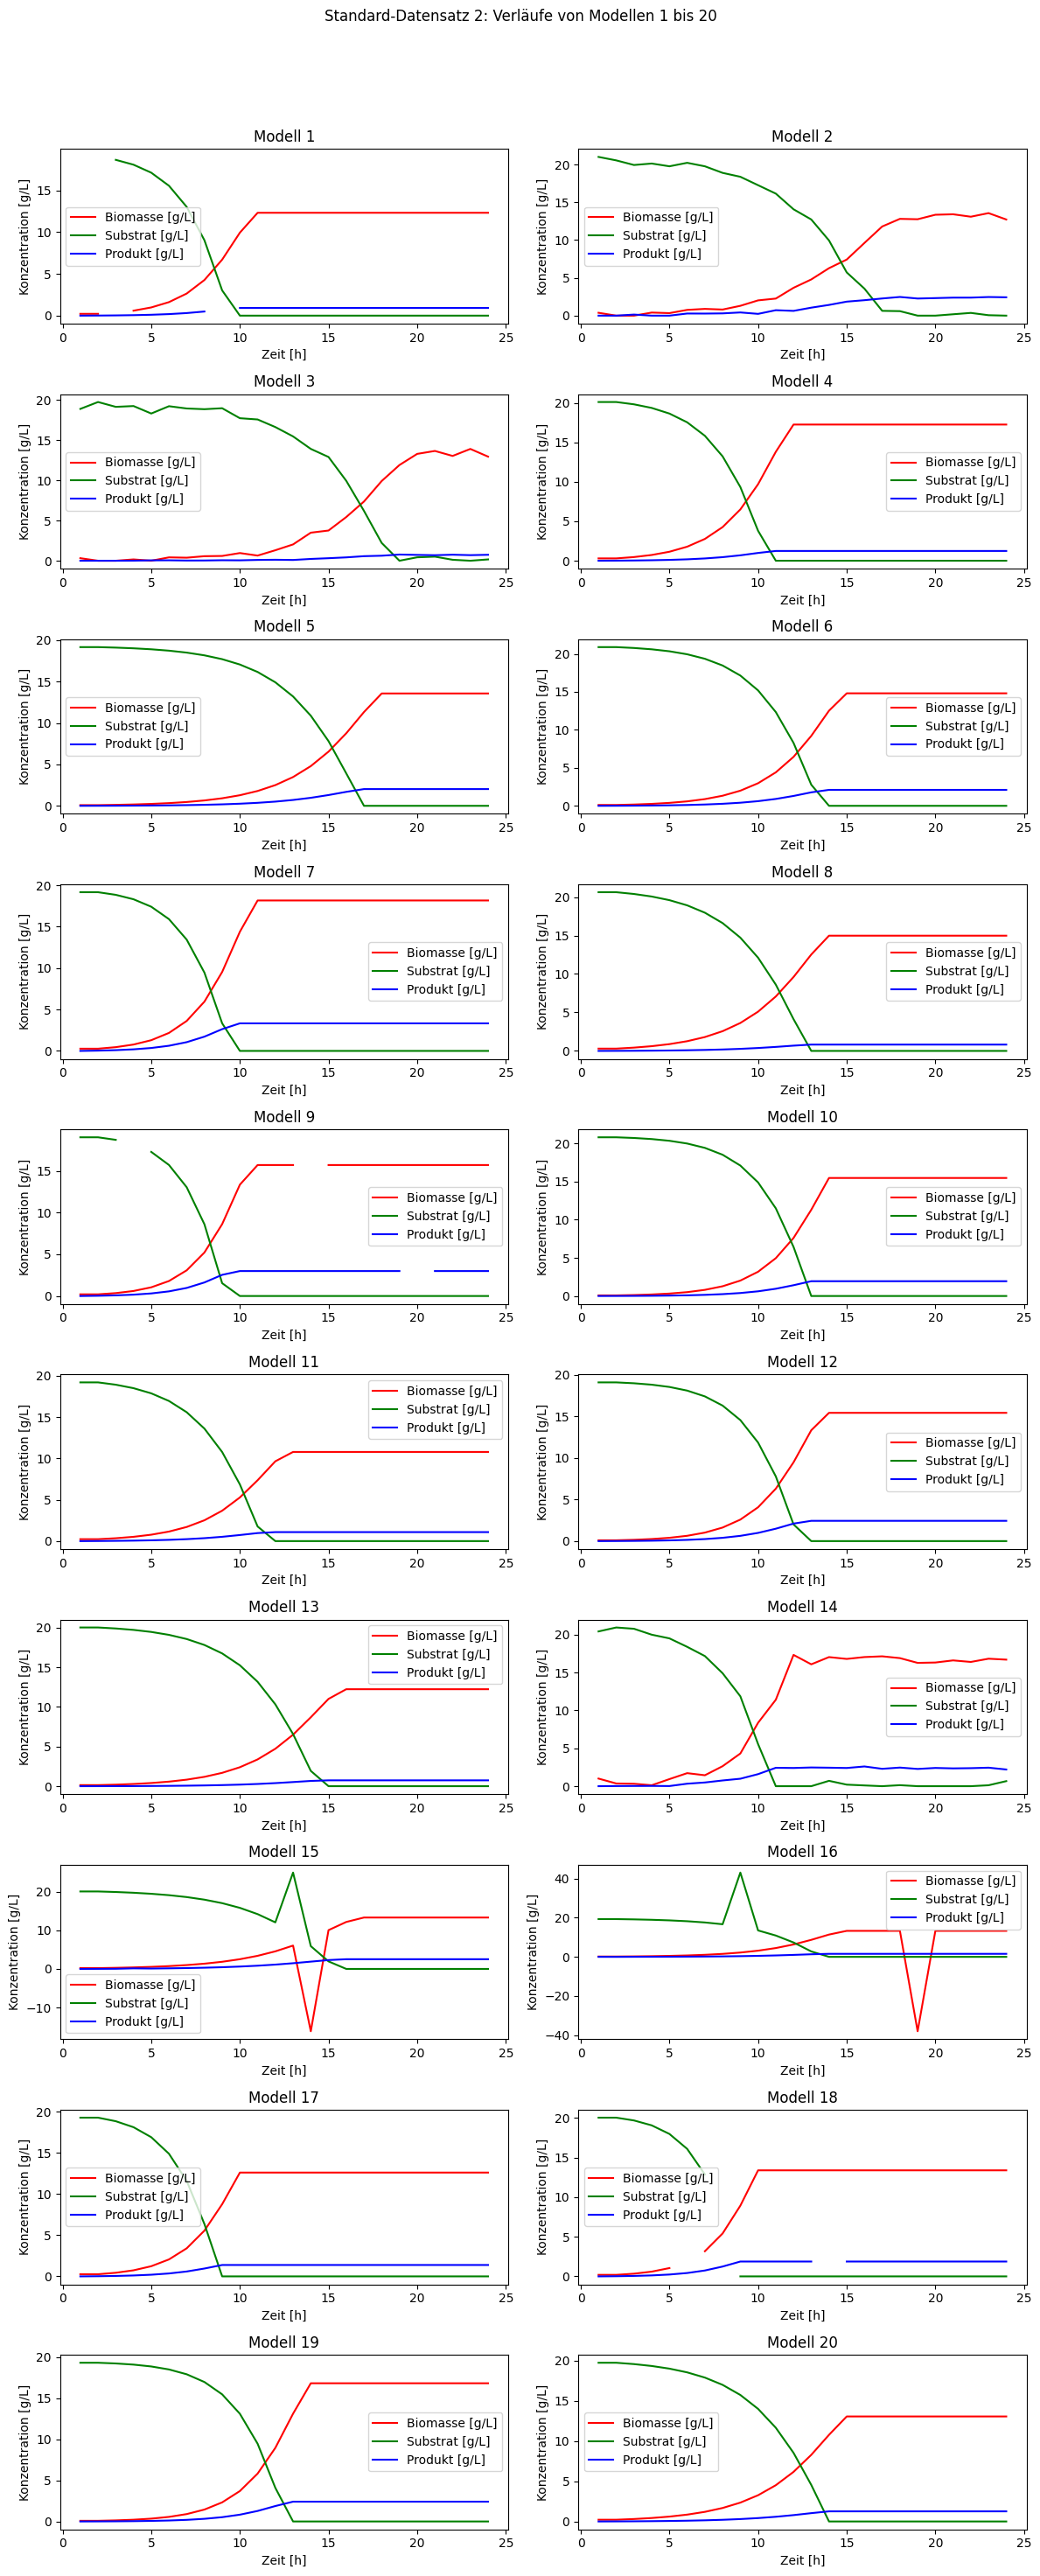

In [13]:
dataset.plot_default_dataset_2()

### 4.1 Lücken in den Daten füllen
In diesem Abschnitt werden wir uns mit der automatisierten Datenbereinigung beschäftigen. Insbesondere geht es um das Füllen von fehlenden Werten (Datenlücken), die in Fermentationsdaten häufig auftreten können. Diese Lücken entstehen durch unvollständige Datenerfassung oder technische Probleme während des Experiments und müssen gefüllt werden, um eine vollständige und kohärente Datenbasis zu erhalten.

Es gibt verschiedene Methoden, um fehlende Werte zu behandeln:

1. **Löschen:** Entfernen von Zeilen oder Spalten mit fehlenden Werten. Dies ist jedoch nur sinnvoll, wenn die Anzahl der fehlenden Werte gering ist.
2. **Auffüllen mit einem konstanten Wert:** Füllen der fehlenden Werte mit einem festen Wert, wie z.B. dem Mittelwert oder Median der Spalte.
3. **Interpolation:** Berechnen der fehlenden Werte basierend auf benachbarten Datenpunkten.
4. **Vorherige oder nachfolgende Werte verwenden:** Füllen der Lücken mit dem vorherigen oder nachfolgenden gültigen Wert.

Wir werden die Methode der **linearen Interpolation** verwenden, um die Datenlücken im Default-Datensatz 2 zu füllen und dann den bereinigten Datensatz plotten.

#### Aufgabe:
- Erstellen Sie eine eigenen python-Funktion für die lineare Interpolation.
- Nutzen Sie eine for-Schleife, um über alle Daten in dem Datensatz zu iterieren.
- Visualisieren Sie die bereinigten Daten und vergleichen Sie sie mit den Originaldaten.


00: Fehlende Werte gefunden. Bereinigung wird durchgeführt.
01: Keine fehlenden Werte in diesem Modell.
02: Keine fehlenden Werte in diesem Modell.
03: Keine fehlenden Werte in diesem Modell.
04: Keine fehlenden Werte in diesem Modell.
05: Keine fehlenden Werte in diesem Modell.
06: Keine fehlenden Werte in diesem Modell.
07: Keine fehlenden Werte in diesem Modell.
08: Fehlende Werte gefunden. Bereinigung wird durchgeführt.
09: Keine fehlenden Werte in diesem Modell.
10: Keine fehlenden Werte in diesem Modell.
11: Keine fehlenden Werte in diesem Modell.
12: Keine fehlenden Werte in diesem Modell.
13: Keine fehlenden Werte in diesem Modell.
14: Keine fehlenden Werte in diesem Modell.
15: Keine fehlenden Werte in diesem Modell.
16: Keine fehlenden Werte in diesem Modell.
17: Fehlende Werte gefunden. Bereinigung wird durchgeführt.
18: Keine fehlenden Werte in diesem Modell.
19: Keine fehlenden Werte in diesem Modell.


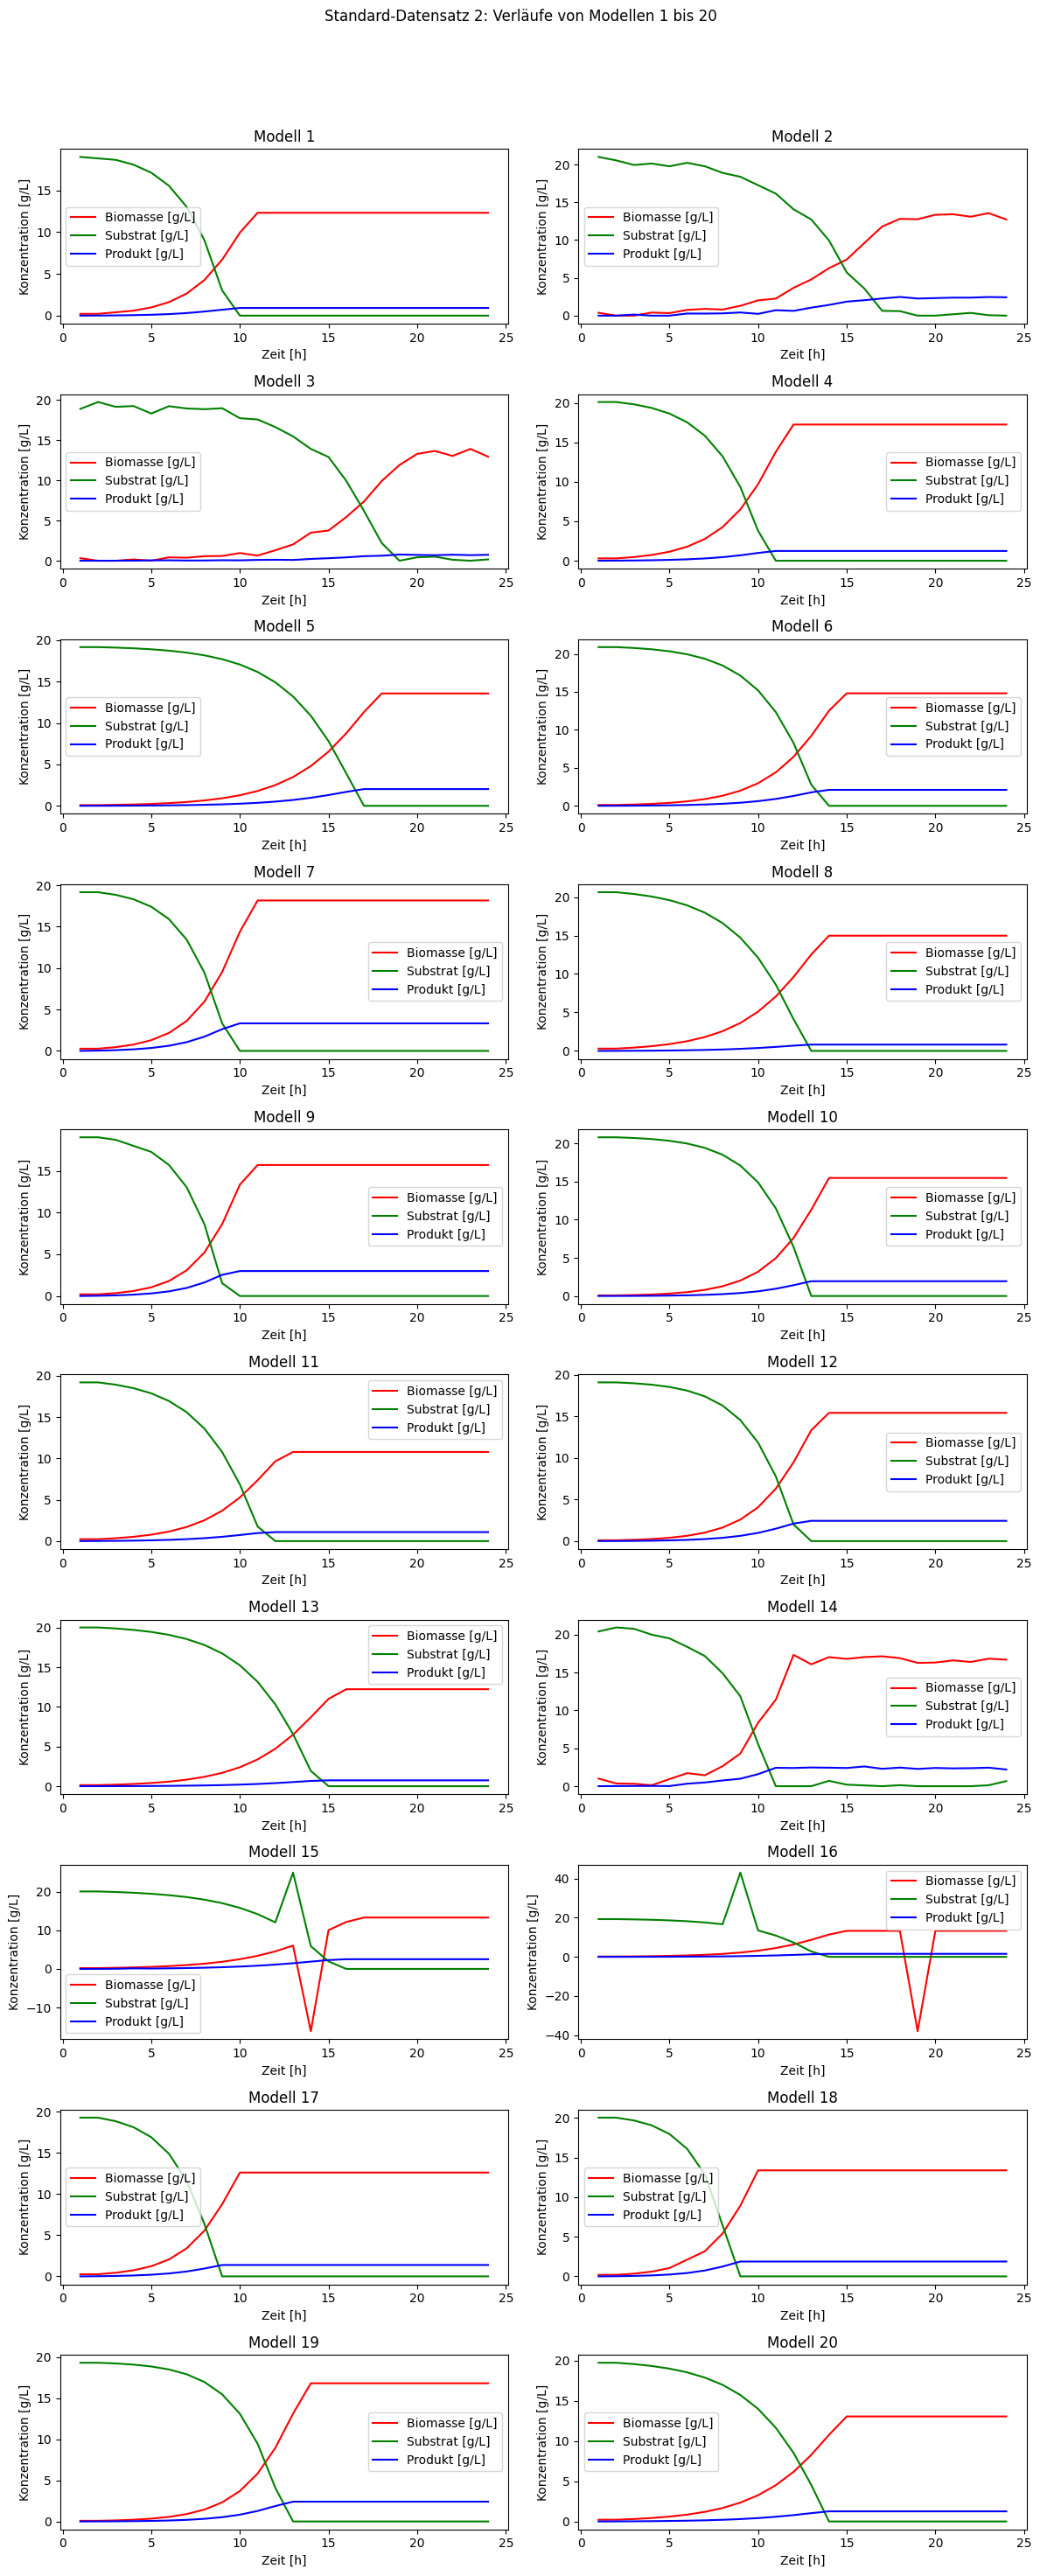

In [14]:
"""
Allgemein sind Funktion nützlich, um einen immer gleichen Ablauf festzuhalten und diesen wiederverwenden zu können.
Da wir in dem Datensatz mehrere Datenlücken haben und diese immer mit der gleichen Methode auffüllen wollen, eignet sich das Schreiben
einer Funktion hervorragend. Somit können auch kleine Anpassungen/Änderungen innerhalb einer Funtkion direkt auf alle Datensätze angewendet werden.
"""
# Funktion zum Füllen fehlender Werte in einem DataFrame
def fill_missing_values(df):
    """
    Füllt die fehlenden Werte im DataFrame `df` sinnvoll auf.
    Verwendet lineare Interpolation, um die Lücken zu schließen.
    
    """
    # Lineare Interpolation für alle Spalten anwenden
    return df.interpolate(method='linear')

# Iterieren über alle Modelle im default_dataset_2
for counter, model in enumerate(dataset.default_dataset_2.models):
    # Laden der Ergebnisse als DataFrame
    df = pd.DataFrame(model.Results)
    
    # Überprüfen, ob es fehlende Werte gibt
    if df.isnull().values.any():
        print(f"{counter:02d}: Fehlende Werte gefunden. Bereinigung wird durchgeführt.")
        
        # Füllen der fehlenden Werte
        df_filled = fill_missing_values(df)
        
        # Aktualisieren der bereinigten Daten im Modell
        model.Results = df_filled.to_dict(orient='list')
    else:
        print(f"{counter:02d}: Keine fehlenden Werte in diesem Modell.")

# Visualisieren der bereinigten Daten im Default-Datensatz 2
dataset.plot_default_dataset_2()

### 4.2 Ausreißer automatisch entfernen

In diesem Abschnitt werden wir uns mit der automatisierten Bereinigung von Ausreißern beschäftigen. Ausreißer sind extreme Werte, die sich stark von der Mehrzahl der Datenpunkte unterscheiden und durch Messfehler, unvorhergesehene Ereignisse oder falsche Dateneingaben entstehen können. Sie können die Analyse und Modellierung erheblich beeinträchtigen, indem sie statistische Berechnungen verzerren und die Vorhersagegenauigkeit von Modellen verringern.

Es gibt verschiedene Methoden, um Ausreißer zu identifizieren und zu entfernen:

- **Interquartilsabstand (IQR)**: Identifizierung von Ausreißern basierend auf dem Abstand zwischen dem ersten und dritten Quartil der Daten. Werte außerhalb des Bereichs von 1,5-mal dem IQR gelten als Ausreißer.
- **Z-Score**: Werte, die mehr als eine bestimmte Anzahl an Standardabweichungen vom Mittelwert abweichen, werden als Ausreißer betrachtet.
- **Quantil-basierte Filterung**: Entfernen von Werten, die unterhalb oder oberhalb bestimmter Prozentränge liegen (z.B. oberste und unterste 1%).

Wir werden die Methode des Interquartilsabstands (IQR) verwenden, um die Ausreißer im Default-Datensatz 2 zu identifizieren und zu entfernen.

#### Aufgabe:
- Erstellen Sie eine eigene Python-Funktion zur Bereinigung von Ausreißern basierend auf dem IQR.
- Nutzen Sie eine for-Schleife, um über alle Modelle im Datensatz zu iterieren.
- Aktualisieren Sie den bereinigten Datensatz und visualisieren Sie die Daten.

00: Bereinigung wird durchgeführt.
01: Bereinigung wird durchgeführt.
02: Bereinigung wird durchgeführt.
03: Bereinigung wird durchgeführt.
04: Bereinigung wird durchgeführt.
05: Bereinigung wird durchgeführt.
06: Bereinigung wird durchgeführt.
07: Bereinigung wird durchgeführt.
08: Bereinigung wird durchgeführt.
09: Bereinigung wird durchgeführt.
10: Bereinigung wird durchgeführt.
11: Bereinigung wird durchgeführt.
12: Bereinigung wird durchgeführt.
13: Bereinigung wird durchgeführt.
14: Bereinigung wird durchgeführt.
15: Bereinigung wird durchgeführt.
16: Bereinigung wird durchgeführt.
17: Bereinigung wird durchgeführt.
18: Bereinigung wird durchgeführt.
19: Bereinigung wird durchgeführt.


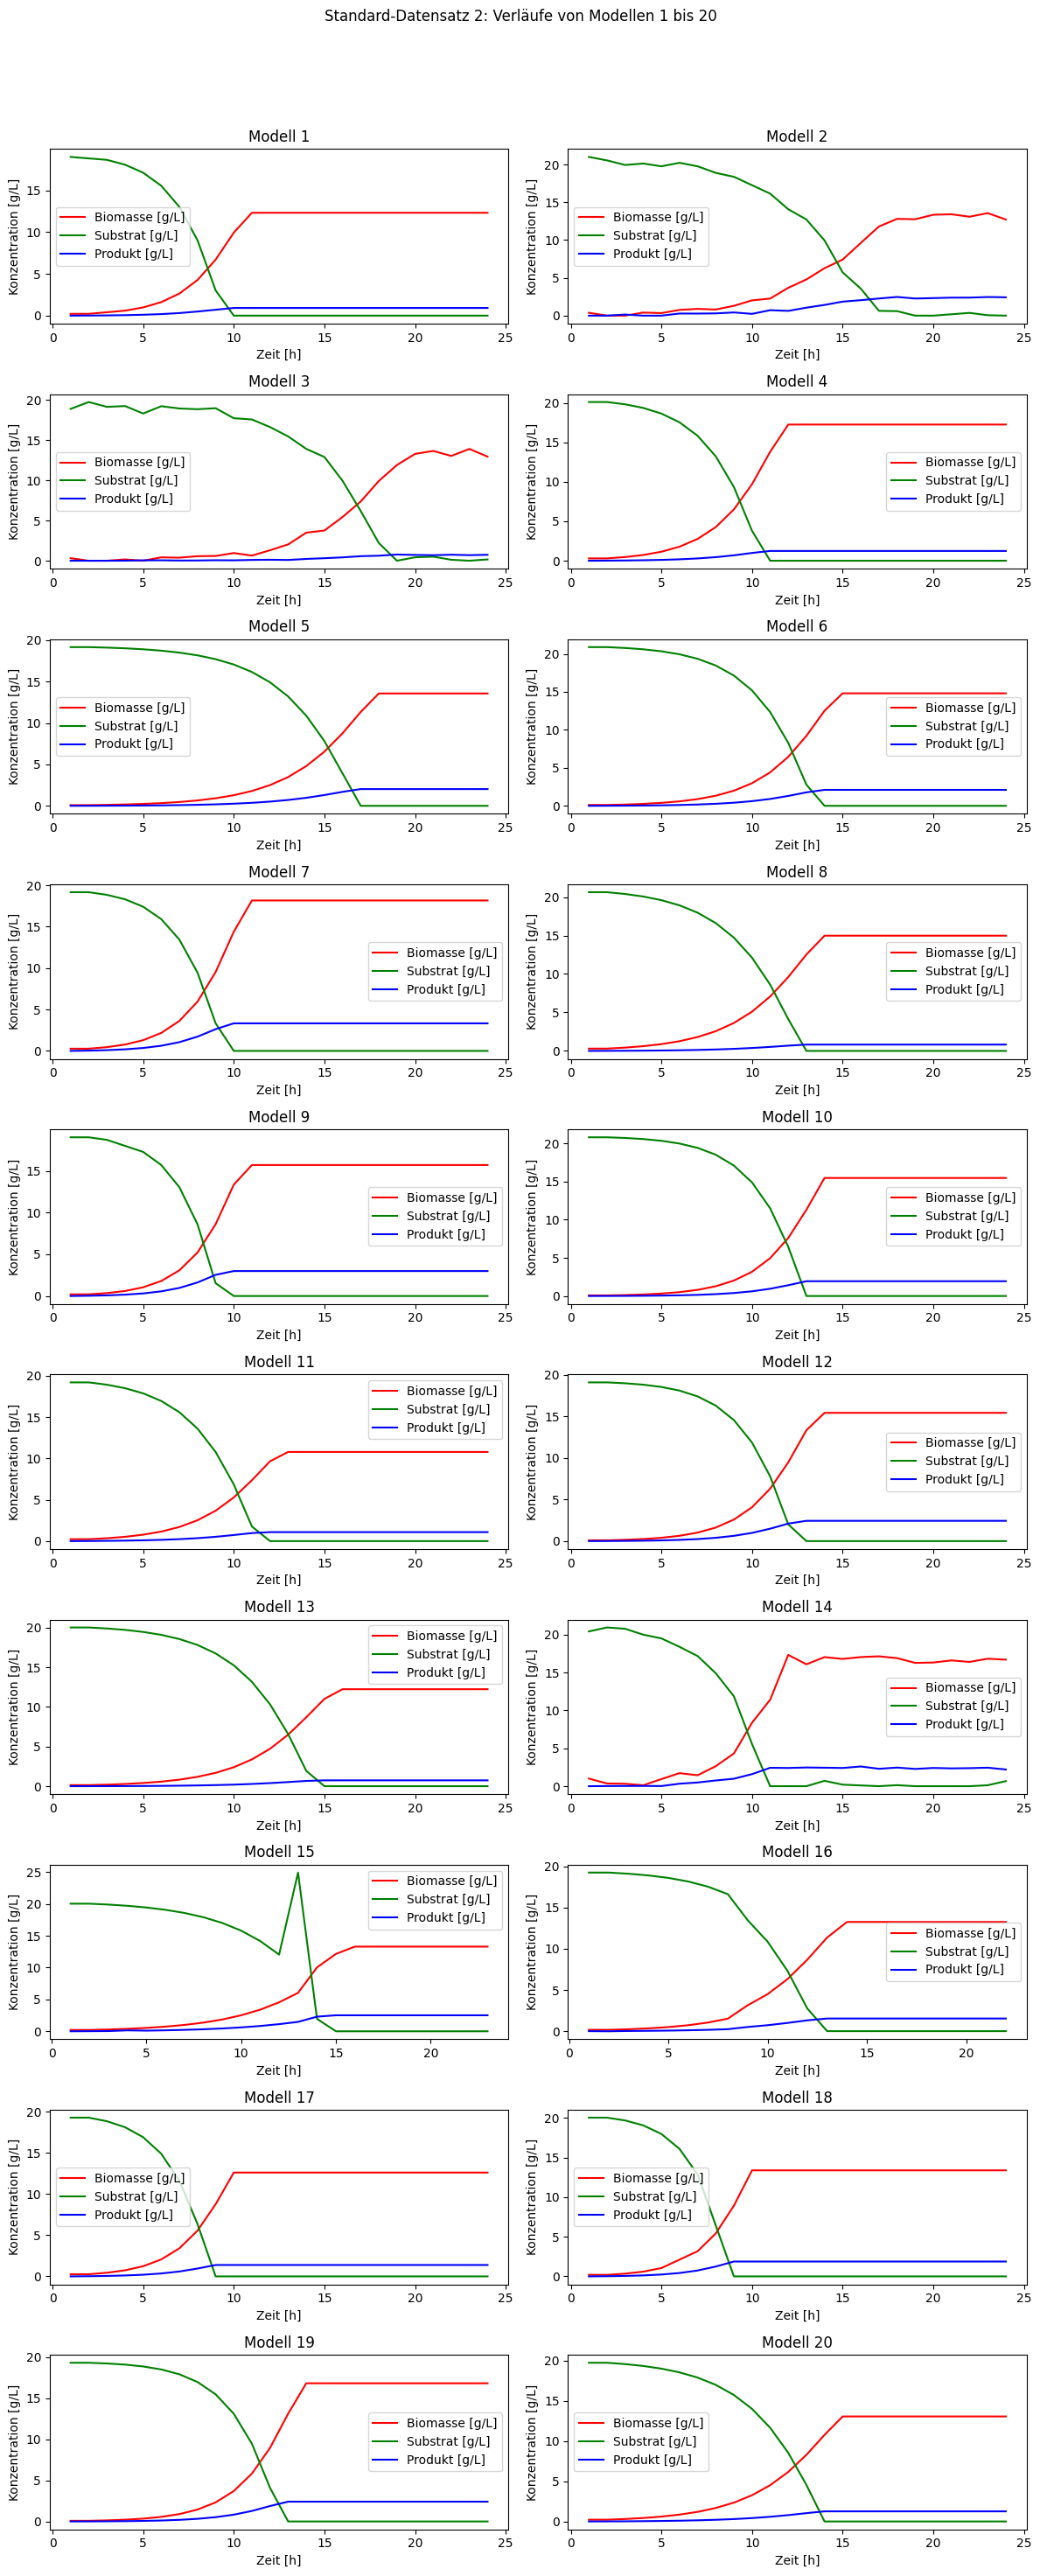

In [16]:
"""
Der folgende Code definiert eine Funktion zur automatischen Erkennung und Entfernung von Ausreißern.
Eine zentrale Funktion ist nützlich, da Ausreißer in mehreren Modellen auftreten können und
konsistent behandelt werden sollten. Dies ermöglicht eine wiederholbare und standardisierte Bereinigung
über alle Datensätze hinweg, ohne dass der Code mehrfach geschrieben werden muss.
Bei dieser Funktion wird schon ersichtlicher warum es sinnvoll ist gewisse Teile eines Programms in Funktionen aufzuteilen.
"""

MULTIPLIER = 1.5   # Den gewünschten Multiplikator hier anpassen

# Funktion zum Entfernen von Ausreißern in einem DataFrame
def remove_outliers(df, multiplier=1.5):
    """
    Entfernt Ausreißer in allen Spalten des DataFrames `df`.
    Verwendet den Interquartilsabstand (IQR), um Ausreißer zu identifizieren und zu entfernen.
    Der `multiplier` bestimmt, wie streng Ausreißer definiert sind (Standardwert ist 1.5).
    """
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Festlegen der Grenzen für akzeptable Werte basierend auf dem Multiplikator
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Entfernen von Ausreißern in der jeweiligen Spalte
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Iterieren über alle Modelle im default_dataset_2 und Ausreißer in allen Spalten entfernen
for counter, model in enumerate(dataset.default_dataset_2.models):
    # Laden der Ergebnisse als DataFrame
    df = pd.DataFrame(model.Results)
    
    # Entfernen der Ausreißer in allen Spalten mit angepasstem Multiplikator
    print(f"{counter:02d}: Bereinigung wird durchgeführt.")
    df_cleaned = remove_outliers(df, multiplier=MULTIPLIER) 
    
    # Aktualisieren der bereinigten Daten im Modell
    model.Results = df_cleaned.to_dict(orient='list')

# Visualisieren der bereinigten Daten im Default-Datensatz 2
dataset.plot_default_dataset_2()

### 4.2.1 Weitere Ausreißer erkennen und entfernen
Es kann vorkommen, dass nach dem ersten Durchlauf immer noch Ausreißer vorhanden sind, dies kann daran liegen, dass die standardmäßigen Parameter der Ausreißerentfernung nicht ausreichen, um alle extremen Werte zu identifizieren. In diesem Fall können Sie verschiedene Anpassungen vornehmen, um die Bereinigung zu verbessern. Sie können den Multiplikator in der IQR-Methode anpassen oder auch andere Methoden, wie den z-Score verwenden und zu guter letzt können Sie die Ausreißer immer noch manuell entfernen. In unserem Fall beschränken wir uns auf die Veränderungen des IQR-Multiplikators, bspw. verringern auf 1.2, um mehr Werte als Ausreißer zu identifizieren.

#### Aufgaben:
- Ändern Sie, falls nötig, den IQR-Multiplikator in der obigen Codezelle.
- Führen Sie diese anschließend neu aus.

#### Hinweis:
Wenn Sie den Multiplikator zu klein gewählt haben, gehen Sie zur zweiten Codezelle zurück und führen diese erneut aus, dann haben Sie die ursrpünglichen Daten wieder. Vergessen Sie ihm Anschluss daran nicht, das die Reihenfolge der automatischen Fehlerbereinigung wichtig ist (1. Lücken, 2. Ausreißer und 3. Rauschen).<br>
Um die händische Ausreißerentfernung vorzunehmen, gehe Sie dafür wie in Kapitel 3.1 vor. Die zu nutzende Id ist ein kleiner als die Zahl im jeweiligen Plot-Titel, da die Nummerierung im Computer immer bei 0 anfängt.


In [22]:
# Codezelle zur händischen Ausreißer Entfernung



### 4.4 Automatische Rauschbeseitigung

Rauschen in Daten kann die Qualität von Analysen und Modellen erheblich beeinträchtigen, da es die Erkennung von echten Trends und Mustern erschwert. Im Gegensatz zu Ausreißern, die einzelne extreme Werte darstellen, besteht Rauschen aus zufälligen Schwankungen. Es kann durch Messungenauigkeiten, Umwelteinflüsse oder technische Störungen entstehen.

Um Rauschen in den Daten zu reduzieren, werden Glättungstechniken wie der gleitende Durchschnitt oder Filtermethoden verwendet. Diese Techniken helfen, das „echte“ Signal in den Daten besser sichtbar zu machen, indem kurzfristige Schwankungen geglättet werden.

Mögliche Methoden zur Rauschbeseitigung:

- **Gleitender Durchschnitt**: Berechnet den Durchschnitt der Datenpunkte in einem definierten Fenster (z.B. 3 oder 5 Punkte), um kurzfristige Schwankungen zu glätten.
- **Exponentielle Glättung**: Gewichtet die Datenpunkte unterschiedlich, wobei neuere Werte stärker berücksichtigt werden.
- **Savitzky-Golay-Filter**: Eine mathematische Methode, um Kurven zu glätten und gleichzeitig das ursprüngliche Signal zu erhalten.
- **Butterworth-Filter**: Ein Tiefpassfilter, der hohe Frequenzen (Rauschen) reduziert und das Signal durchlässt.

Wir werden die Methode des gleitenden Durchschnitts verwenden, um das Rauschen im Default-Datensatz 2 zu reduzieren und die geglätteten Daten anschließend zu visualisieren.

#### Aufgabe:

- Erstellen Sie eine eigene Python-Funktion zur Glättung der Daten mit einem gleitenden Durchschnitt.
- Wenden Sie die Funktion auf alle Modelle im Datensatz an.
- Visualisieren Sie die geglätteten Daten und vergleichen Sie sie mit den Originaldaten.

00: Glättung der Daten wird durchgeführt.
01: Glättung der Daten wird durchgeführt.
02: Glättung der Daten wird durchgeführt.
03: Glättung der Daten wird durchgeführt.
04: Glättung der Daten wird durchgeführt.
05: Glättung der Daten wird durchgeführt.
06: Glättung der Daten wird durchgeführt.
07: Glättung der Daten wird durchgeführt.
08: Glättung der Daten wird durchgeführt.
09: Glättung der Daten wird durchgeführt.
10: Glättung der Daten wird durchgeführt.
11: Glättung der Daten wird durchgeführt.
12: Glättung der Daten wird durchgeführt.
13: Glättung der Daten wird durchgeführt.
14: Glättung der Daten wird durchgeführt.
15: Glättung der Daten wird durchgeführt.
16: Glättung der Daten wird durchgeführt.
17: Glättung der Daten wird durchgeführt.
18: Glättung der Daten wird durchgeführt.
19: Glättung der Daten wird durchgeführt.


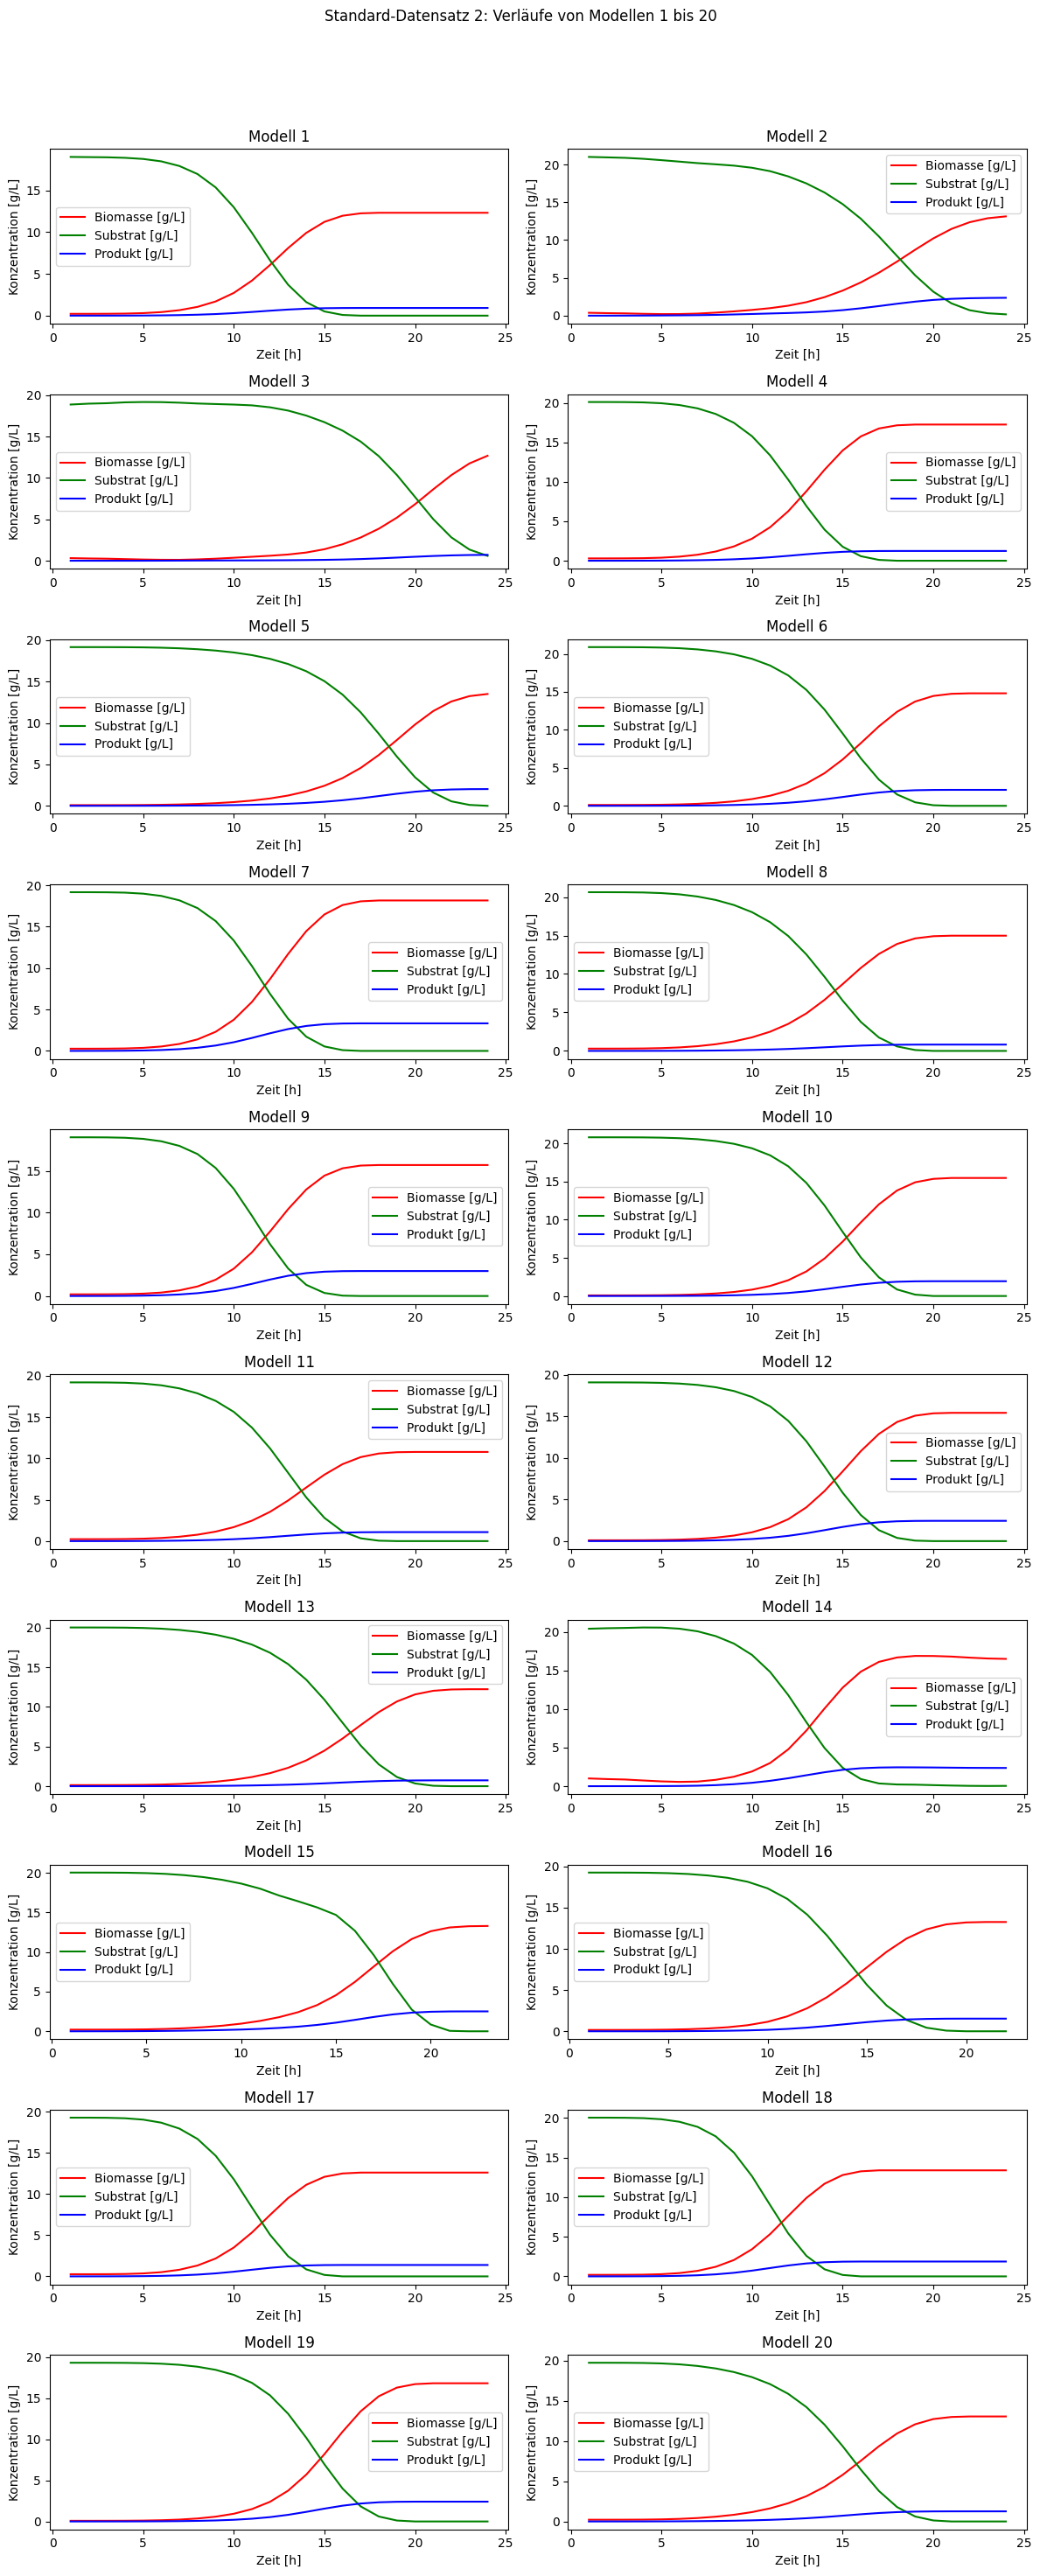

In [19]:
WINDOW_SIZE = 3  # Den gewünschten Fensterwert hier anpassen

# Funktion zum Glätten der Daten mit gleitendem Durchschnitt
def smooth_data(df, window):
    """
    Glättet alle Spalten des DataFrames `df` mit einem gleitenden Durchschnitt.
    Der Parameter `window` bestimmt die Anzahl der Datenpunkte, die für den Durchschnitt verwendet werden.
    """
    return df.rolling(window=window, min_periods=1).mean()

# Iterieren über alle Modelle im default_dataset_2 und Rauschen in allen Spalten glätten
for counter, model in enumerate(dataset.default_dataset_2.models):
    # Laden der Ergebnisse als DataFrame
    df = pd.DataFrame(model.Results)
    
    # Glätten der Daten in allen Spalten
    print(f"{counter:02d}: Glättung der Daten wird durchgeführt.")
    df_smoothed = smooth_data(df, window=WINDOW_SIZE)  
    
    # Aktualisieren der geglätteten Daten im Modell
    model.Results = df_smoothed.to_dict(orient='list')

# Visualisieren der geglätteten Daten im Default-Datensatz 2
dataset.plot_default_dataset_2()

### 4.3.1 Anpassung der Glättung: Fenstergröße ändern

Falls nach der ersten Glättung noch immer deutliche Rauschmuster oder Schwankungen in den Daten sichtbar sind, kann es notwendig sein, die Fenstergröße des gleitenden Durchschnitts anzupassen. Die Wahl der richtigen Fenstergröße ist entscheidend, um das Rauschen zu reduzieren, ohne dabei wichtige Signale und Trends zu verlieren.

Hinweis:

Wenn Sie die Fenstergröße zu groß gewählt haben, gehen Sie zur zweiten Codezelle zurück und führen Sie diese erneut aus, dann haben Sie die ursrpünglichen Daten wieder. Vergessen Sie ihm Anschluss daran nicht, das die Reihenfolge der automatischen Fehlerbereinigung wichtig ist (1. Lücken, 2. Ausreißer und 3. Rauschen).
Um die händische Rauschbereinigung vorzunehmen, gehen Sie dafür wie in Kapitel 3.3 vor. Die zu nutzende Id ist ein kleiner als die Zahl im jeweiligen Plot-Titel, da die Nummerierung im Computer immer bei 0 anfängt.

In [21]:
# Codezelle zur händischen Rauschbeseitigung



### 5 Nutzen der bereinigten Daten
In realen Datensätzen treten oft nicht nur einzelne Fehlerarten auf, sondern verschiedene Kombinationen aus Fehlern. Ein Modell kann gleichzeitig Datenlücken, Ausreißer und Rauschen enthalten, was die Datenbereinigung deutlich erschwert. Um eine hohe Datenqualität zu gewährleisten, ist es wichtig, alle Fehlerarten systematisch zu bereinigen.

Der dritte Default-Datensatz enthält eine große Anzahl von Modellen mit verschiedenen Kombinationen aus Datenlücken, Ausreißern und Rauschen. Wir werden uns diesen Datensatz genauer ansehen und die einzelnen Bereinigungsschritte nacheinander durchführen, um die Daten von allen Fehlern zu bereinigen.

Im folgenden Codeblock wird ein Ausschnitt des Default-Datensatz 3 geplottet, um einen groben Überblick über die Daten vor der Bereinigung zu erhalten.

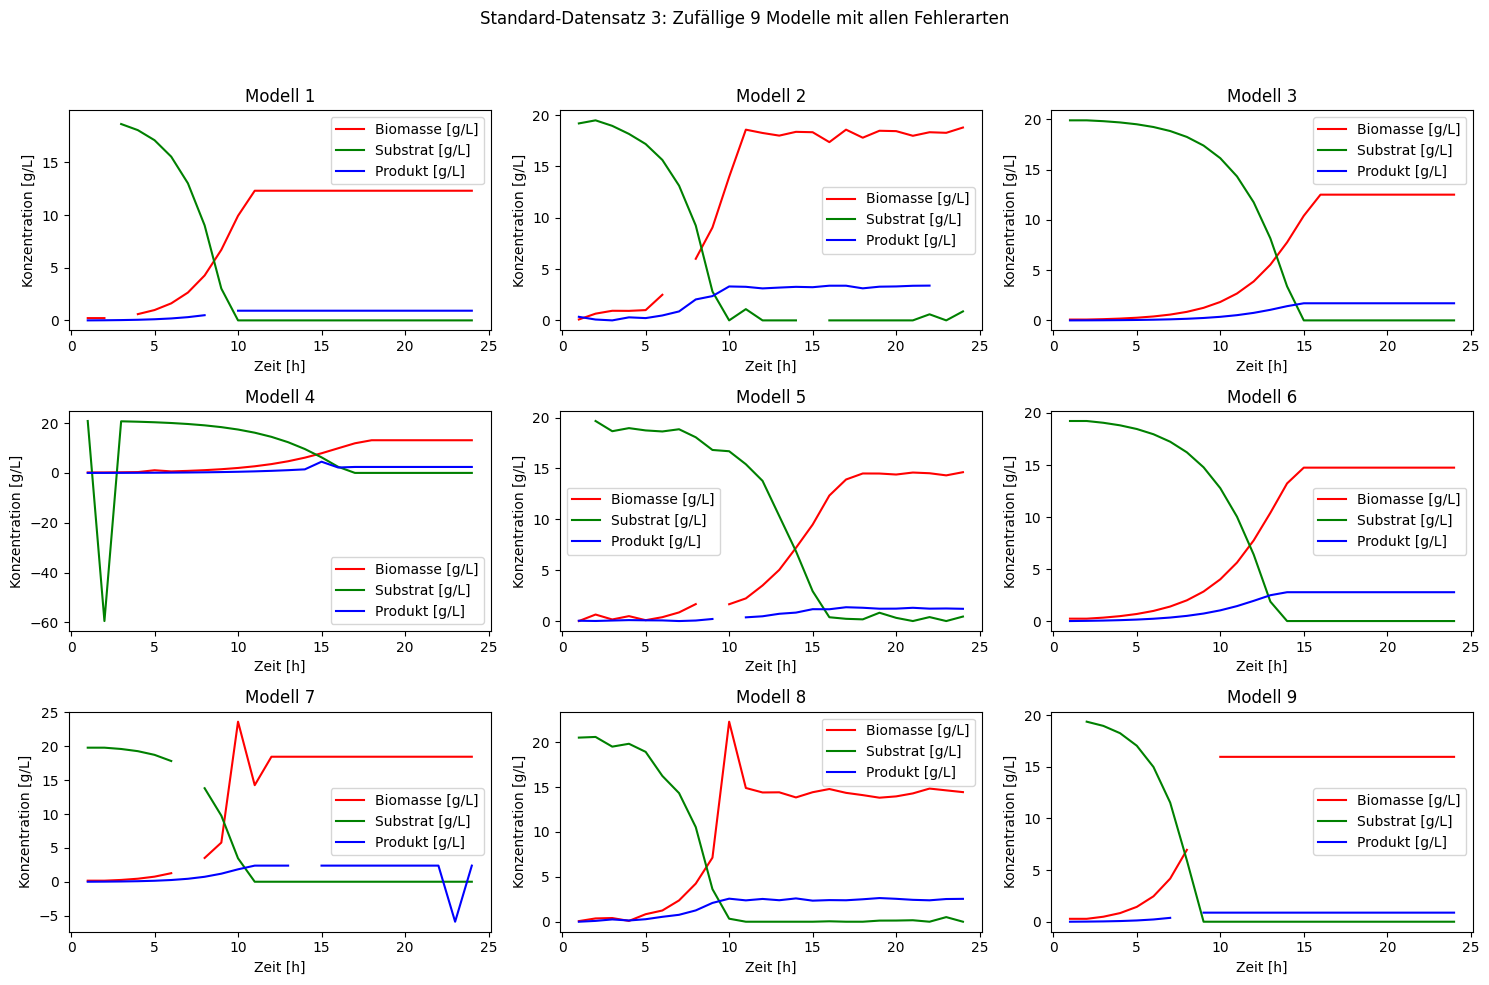

In [23]:
dataset.plot_default_dataset_3()

In diesem Abschnitt wenden wir die automatisierten Bereinigungsschritte nacheinander auf den dritten Default-Datensatz an, um die Datenqualität zu verbessern und sie für die weitere Analyse nutzbar zu machen. Die Reihenfolge der Bereinigung ist dabei entscheidend:

1. **Lücken in den Daten füllen**: Zuerst werden alle fehlenden Werte in den Datensätzen aufgefüllt, um eine vollständige Datenbasis zu schaffen.
2. **Ausreißer entfernen**: Anschließend werden extreme Werte, die das Gesamtbild verzerren, identifiziert und entfernt.
3. **Rauschen glätten**: Schließlich wird das verbleibende Rauschen reduziert, um das wahre Signal in den Daten besser sichtbar zu machen.

Durch diese systematische Bereinigung erhalten wir saubere, qualitativ hochwertige Daten, die sich für die Modellierung und weitere Analysen eignen. Führen Sie den folgenden Codeblock aus, um die Bereinigungen in einem Schritt auf alle Datensätze anzuwenden und die Ergebnisse zu visualisieren.

00: Füllen der Lücken wird durchgeführt.
00: Entfernen der Ausreißer wird durchgeführt.
00: Glätten der Daten wird durchgeführt.
01: Füllen der Lücken wird durchgeführt.
01: Entfernen der Ausreißer wird durchgeführt.
01: Glätten der Daten wird durchgeführt.
02: Füllen der Lücken wird durchgeführt.
02: Entfernen der Ausreißer wird durchgeführt.
02: Glätten der Daten wird durchgeführt.
03: Füllen der Lücken wird durchgeführt.
03: Entfernen der Ausreißer wird durchgeführt.
03: Glätten der Daten wird durchgeführt.
04: Füllen der Lücken wird durchgeführt.
04: Entfernen der Ausreißer wird durchgeführt.
04: Glätten der Daten wird durchgeführt.
05: Füllen der Lücken wird durchgeführt.
05: Entfernen der Ausreißer wird durchgeführt.
05: Glätten der Daten wird durchgeführt.
06: Füllen der Lücken wird durchgeführt.
06: Entfernen der Ausreißer wird durchgeführt.
06: Glätten der Daten wird durchgeführt.
07: Füllen der Lücken wird durchgeführt.
07: Entfernen der Ausreißer wird durchgeführt.
07: Glätt

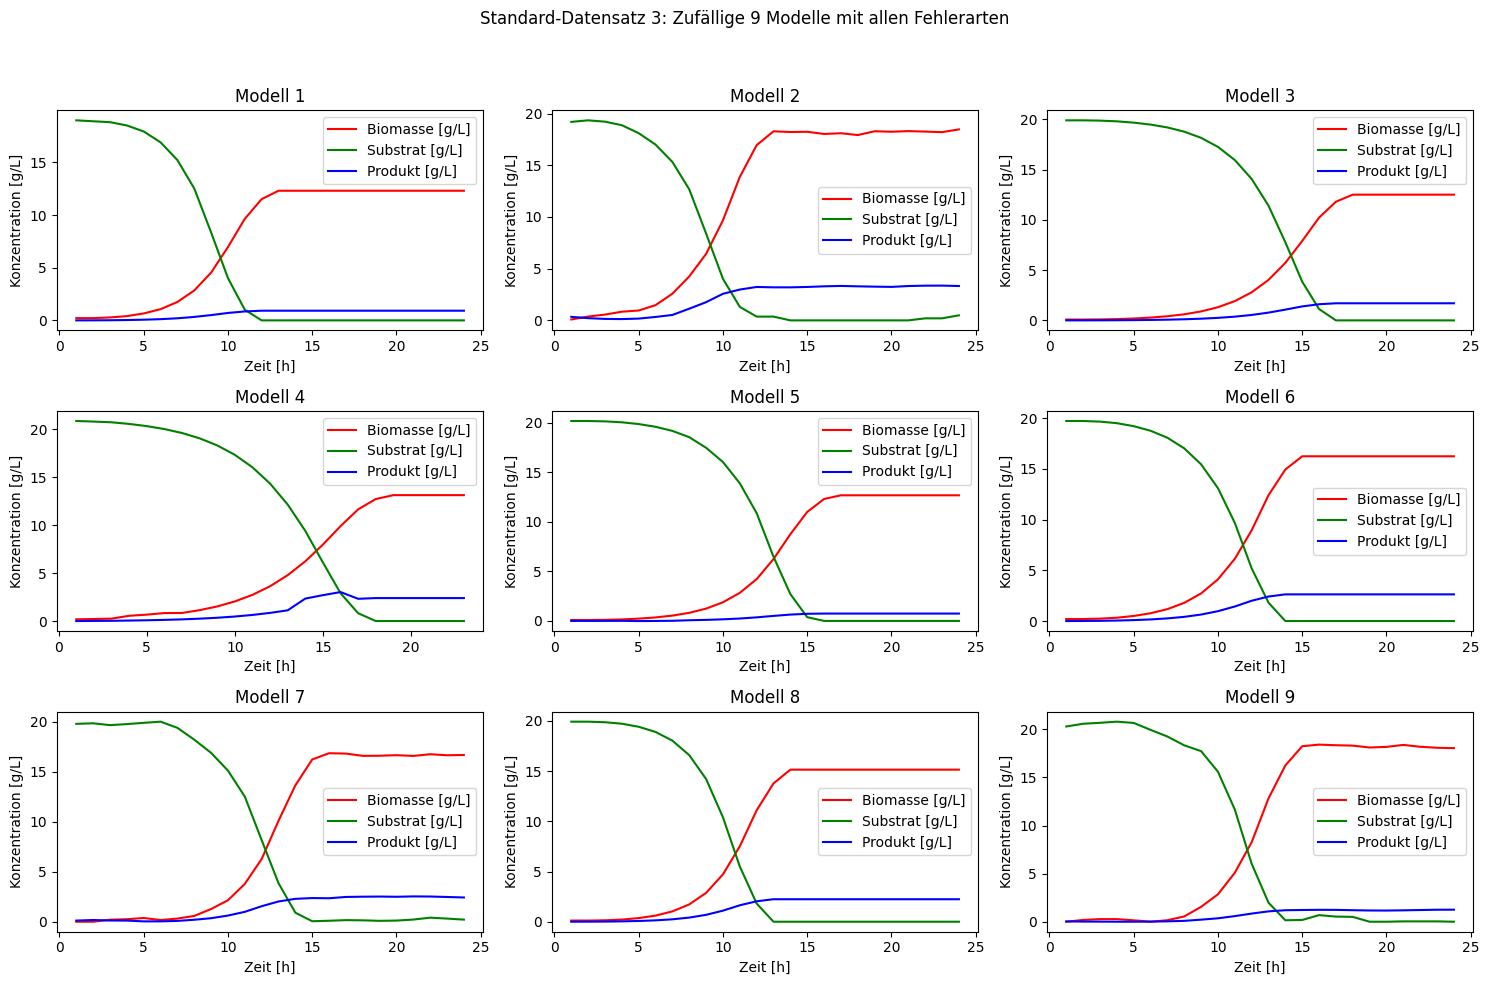

In [24]:
NEW_MULTIPLIER = 1.5 # Den gewünschten Multiplikator hier anpassen
NEW_WINDOW_SIZE = 3  # Den gewünschten Fensterwert hier anpassen

# Iterieren über alle Modelle im dritten Default-Datensatz und alle Bereinigungsschritte durchführen
for counter, model in enumerate(dataset.default_dataset_3.models):
    # Laden der Ergebnisse als DataFrame
    df = pd.DataFrame(model.Results)
    
    # Schritt 1: Lücken in den Daten füllen
    # print(f"{counter:03d}: Füllen der Lücken wird durchgeführt")
    df_filled = fill_missing_values(df)
    
    # Schritt 2: Ausreißer entfernen
    # print(f"{counter:03d}: Entfernen der Ausreißer wird durchgeführt")
    df_no_outliers = remove_outliers(df_filled, multiplier=NEW_MULTIPLIER)  
    
    # Schritt 3: Rauschen glätten
    # print(f"{counter:03d}: Glätten der Daten wird durchgeführt")
    df_smoothed = smooth_data(df_no_outliers, window=NEW_WINDOW_SIZE)  
    
    # Aktualisieren der bereinigten Daten im Modell
    model.Results = df_smoothed.to_dict(orient='list')
    print(f"{counter:03d}: Fehler bereinigt und gespeichert")

# Visualisieren der bereinigten Daten im Default-Datensatz 3
dataset.plot_default_dataset_3()

### 5.1 KNN-Modell Erstellung

Nachdem die Daten erfolgreich bereinigt wurden, können wir sie nutzen, um ein einfaches maschinelles Lernmodell zu erstellen. Ein k-Nearest Neighbors (KNN)-Modell ist eine geeignete Wahl, da es auf der Nähe von Datenpunkten basiert und empfindlich auf die Datenqualität reagiert. Es verwendet die k nächsten Nachbarn, um eine Vorhersage zu treffen, und kann leicht Unterschiede in den Daten erkennen.

In diesem Abschnitt werden wir ein KNN-Modell trainieren, um die Produktkonzentration auf Basis der Substrat- und Biomassekonzentrationen vorherzusagen. Dadurch können wir die Auswirkungen der verschiedenen Bereinigungsschritte auf die Modellleistung besser verstehen.

Schritte:

1. **Datenvorbereitung**: Die bereinigten Daten werden in Trainings- und Testdaten unterteilt.
2. **Modellerstellung**: Ein KNN-Modell wird trainiert, um die Produktkonzentration vorherzusagen.
3. **Modellbewertung**: Die Vorhersagegenauigkeit des Modells wird überprüft, um die Leistungsfähigkeit des KNN-Modells auf den bereinigten Daten zu bewerten.

In [27]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Bereinigung und Zusammenfassung aller Daten aus Default-Datensatz 3
data = pd.concat([pd.DataFrame(model.Results) for model in dataset.default_dataset_3.models])

# Definieren der Eingangs- und Zielvariablen
X = data[['X', 'S']]  # Biomasse und Substrat als Eingangsvariablen
y = data['P']         # Produktkonzentration als Zielvariable

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des KNN-Modells
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = knn.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 11.0/11.0 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 4.6 MB/s eta 0:00:00
Mean Squared Error (MSE): 0.1725
R^2 Score: 0.8027


### 5.2 Bewertung der Modellleistung und Reflexion über die Auswirkungen der Datenbereinigung

Die Datenbereinigung hat einen direkten Einfluss auf die Qualität und Leistungsfähigkeit von Modellen. Bei schlecht bereinigten Daten kann das Modell übermäßiges Rauschen oder systematische Fehler lernen, was zu schlechten Vorhersagen führt. Durch die Bereinigung konnten wir die Datenqualität verbessern und somit die Modellleistung steigern.

Reflexion:

- **Einfluss der Datenlücken**: Fehlende Werte führen zu unvollständigen Informationen. Durch die Interpolation konnten wir diese Lücken sinnvoll füllen und eine kohärente Datenbasis schaffen.
- **Einfluss der Ausreißer**: Ausreißer können das Modell stark beeinflussen und zu falschen Vorhersagen führen. Die Entfernung dieser extremen Werte hat die Modellleistung verbessert.
- **Einfluss des Rauschens**: Rauschen verdeckt echte Muster und macht es dem Modell schwer, die wahren Zusammenhänge zu lernen. Durch die Glättung der Daten konnten wir das Signal herausarbeiten und die Vorhersagegenauigkeit erhöhen.

Die Kombination aus allen Bereinigungsschritten führt zu einem robusteren Modell, das bessere Vorhersagen trifft und weniger anfällig für Fehler in den Daten ist.


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


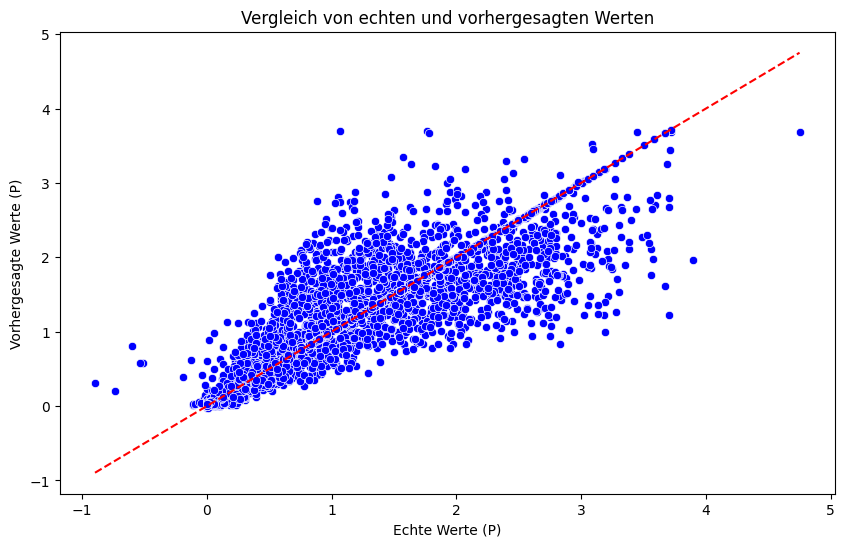

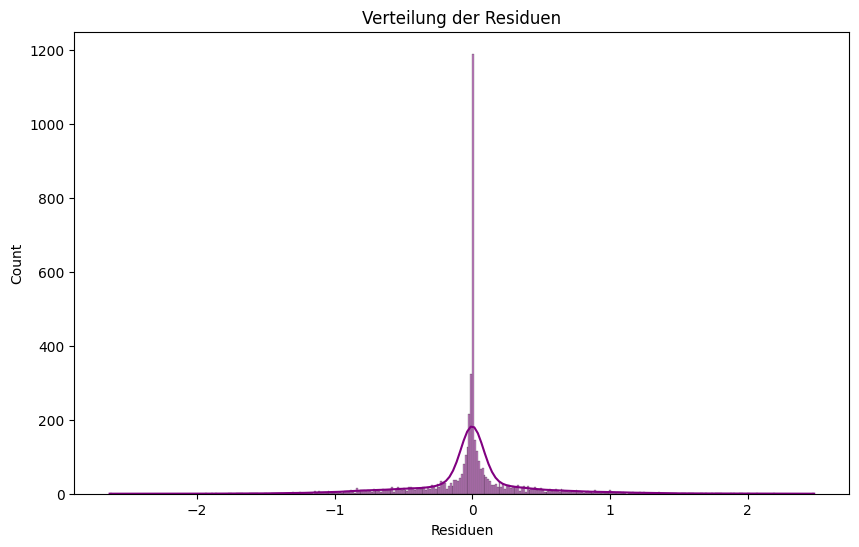

In [31]:
!pip install seaborn
import seaborn as sns

# Visualisierung der Modellvorhersagen im Vergleich zu den echten Werten
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Echte Werte (P)')
plt.ylabel('Vorhergesagte Werte (P)')
plt.title('Vergleich von echten und vorhergesagten Werten')
plt.show()

# Residuenplot
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, color='purple')
plt.xlabel('Residuen')
plt.title('Verteilung der Residuen')
plt.show()
